# **CHAPTER_4**

## **4.1 NumPy ndarray: 다차원 배열 객체**

Numpy


* 브로드캐스팅 기능 제공
* 배열을 빠르게 계산할 수 있는 표준 수학 함수 
* 선형대수, 난수 생성기, 푸리에 변환 가능 
* C, C++, 포트란으로 작성한 코드를 연결할 수 있는 C API
* 다른 내장 파이썬 객체와 구분된 연속된 메모리 블록에 저장하며, 다른 오버헤드 없이 메모리를 직접 조작할 수 있고, 더 적은 메모리를 사용한다. 

In [ ]:
import numpy as np

my_arr = np.arange(100000)
my_list = list(range(100000))

In [ ]:
# numpy를 사용한 코드가 20배 이상 빠른 것을 확인할 수 있다.

%time for _ in range(10): my_arr2 = my_arr * 2
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

CPU times: user 3.26 ms, sys: 325 µs, total: 3.58 ms
Wall time: 7.65 ms
CPU times: user 69.3 ms, sys: 6.86 ms, total: 76.1 ms
Wall time: 76.2 ms


### **4.1.1 ndarray 생성하기**

In [ ]:
# array 함수를 이용해 배열 생성

data1 = [20, 21, 1, 20, 2]
arr1 = np.array(data1)
arr1

array([20, 21,  1, 20,  2])

In [ ]:
# 차원 확인 - 1차원 형태를 가진 것을 확인할 수 있다

arr1.shape

(5,)

array에 포함된 모든 자료 형태는 동일해야하며, zeros나 ones 함수로 주어진 길이나 모양에 대해 0과 1로 채워진 배열을 생성할 수 있다. 

empty 함수의 경우 초기화된 배열을 반환하지 않고 가비지 값으로 채워진 배열을 반환한다. 

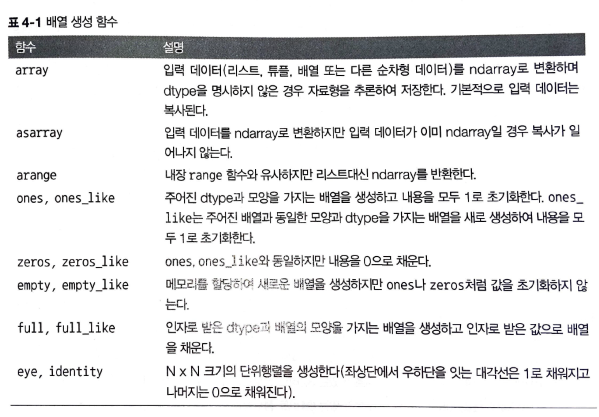

### **4.1.2 ndarray와 dtype**

dtype으로 특정 데이터를 해석하기 위한 객체를 사용함으로서 저수준 언어로 작성된 코드와 쉽게 연동할 수 있다. astype 메서드를 통해 배열의 dtype을 다른 형으로 변환할 수 있다. 

In [ ]:
# type code를 u4로 하면 uint32 type으로 변환 가능하다. 

empty_uint32 = np.empty(8, dtype='u4')
empty_uint32

array([         0, 1072693248,          0, 1072693248,          0,
       1072693248,          0,          0], dtype=uint32)

### **4.1.3 NumPy 배열의 산술 연산**

배열의 벡터화를 통해서 연산을 일괄적으로 처리할 수 있다. 스칼라 인자가 포함된 경우 모든 원소에 스칼라 인자가 적용되며, 배열 간의 비교는 불리언 배열을 반환한다. 

### **4.1.4 색인과 슬라이싱 기초**

In [ ]:
# 배열 생성 
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# 일부를 슬라이싱하여 배열 할당
arr_slice = arr[5:8]
arr_slice

array([5, 6, 7])

In [ ]:
# 할당된 배열 값을 바꾸면 기존의 값에서 복사가 일어나는 것을 확인할 수 있다
arr_slice[:] = 20
arr

array([ 0,  1,  2,  3,  4, 20, 20, 20,  8,  9])

In [ ]:
# 2x2x3 크기의 배열을 생성한 후 스칼라 값을 대입하고 다시 기존의 값을 채운다

arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [ ]:
# copy 함수를 통해서 2x3 크기의 배열 값을 저장하고 대입한다 
old_values = arr3d[0].copy()
arr3d[0] = 42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [ ]:
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [ ]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [ ]:
# 배열 중 2행까지, 1열부터의 값 선택
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

### **4.1.5 불리언값으로 선택하기**

rand 함수를 통해서 임의의 정규 분포 데이터를 생성할 수 있다. 또한 산술 연산을 바탕으로 불리언 배열을 생성할 수 있으며 이는 배열의 색인으로 사용된다. 만약 조건에 해당하지 않는 요소들을 선택하기 위해서는 != 연산자나 ~를 사용해서 조건절을 부인한다.

여러 조건을 적용하고 싶은 경우 &나 | 연산자를 사용한다. 

In [ ]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [ ]:
# Bob에 해당하는 인덱스와 2:인 칼럼을 선택한다. 
data[names == 'Bob', 2:]

array([[-0.62323648,  2.57346035],
       [ 0.4178382 ,  0.38374994]])

In [ ]:
data[data < 0] = 0
data

array([[0.97558287, 0.        , 0.        , 2.57346035],
       [0.        , 0.97297381, 1.07331069, 0.41255428],
       [0.91781678, 0.        , 0.        , 0.        ],
       [1.09465096, 1.63069851, 0.4178382 , 0.38374994],
       [0.        , 0.01931068, 0.21461299, 0.        ],
       [0.        , 0.        , 0.26783069, 0.41316186],
       [0.        , 0.43415064, 2.09336593, 0.31719647]])

### **4.1.6 팬시 색인**

정수 배열을 사용한 색인을 설명하기 위해 NumPy에서 차용한 단어 

In [ ]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [ ]:
# (1,0), (5,3), (7,1), (2,2)에 대응되는 원소 선택 
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

### **4.1.7 배열 전치와 축 바꾸기** 

다차원 배열에서는 transpose 메서드를 이용해 튜플로 축 번호를 받아 치환할 수 있다. 또한 swapaxes 메서드를 통해 두 개의 축 번호를 받아서 배열을 바꿀 수 있다. 

In [ ]:
# 전치행렬 

arr = np.arange(15).reshape((3, 5))
arr
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [ ]:
# 행렬내적, dot 함수 사용
arr = np.random.randn(6, 3)
arr
np.dot(arr.T, arr)

array([[ 3.34027011,  1.81420693, -3.02243689],
       [ 1.81420693,  5.13233143, -0.36645609],
       [-3.02243689, -0.36645609,  6.07116786]])

In [ ]:
arr = np.arange(16).reshape((2, 2, 4))
arr.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

## **4.2 유니버설 함수: 배열의 각 원소를 빠르게 처리하는 함수** 

벡터화된 래퍼 함수로 하나 이상의 스칼라값을 받아서 하나 이상의 스칼라 결괏값을 반환하는 함수를 빠른 속도로 수행할 수 있다. 변형 결과를 전체 원소에 적용할 수 있으며, 취하는 인자의 개수에 따라 단항, 이항 유니버설 함수로 구분된다. 

modf 함수의 경우 몫과 나머지 두 개의 배열을 반환한다. 

In [ ]:
arr = np.random.randn(7) * 5
arr
remainder, whole_part = np.modf(arr)

In [ ]:
remainder

array([-0.44740639,  0.69721499,  0.82528092,  0.84084874,  0.04686517,
        0.15225043, -0.67668107])

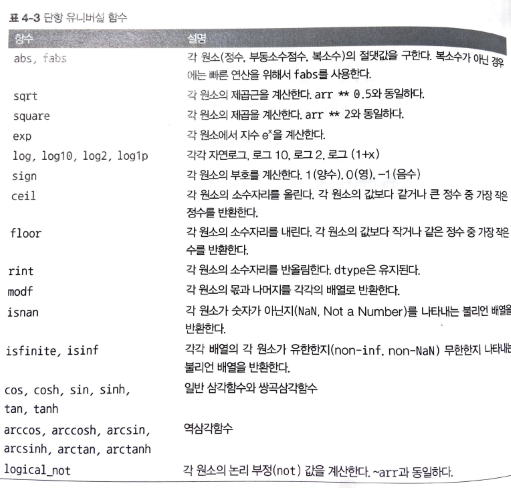

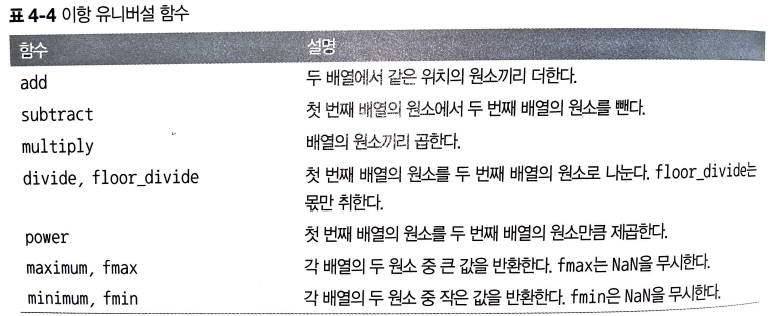

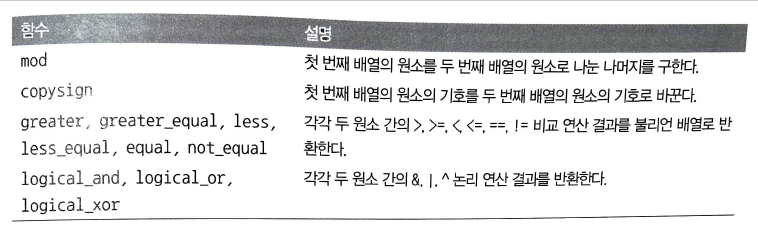

## **4.3 배열을 이용한 배열지향 프로그래밍**

In [ ]:
# meshgrid 함수를 이용해 모든 가능한 순서쌍을 형성한다. 
points = np.arange(-5, 5, 0.01) 
xs, ys = np.meshgrid(points, points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [ ]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

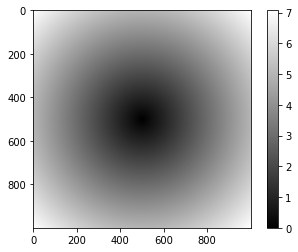

In [ ]:
# 순서쌍에 대한 계산 결과값을 시각화한다. 
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()

### **4.3.1 배열 연산으로 조건절 표현하기**

In [ ]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [ ]:
# cond가 true일 경우 xarr, 아닐 경우 yarr 반환 
%time
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]
result

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.39 µs


[1.1, 2.2, 1.3, 1.4, 2.5]

In [ ]:
# 현재는 비슷한 시간이 소요되지만, 향후에 큰 배열에 대해서는 더 빠르게 처리된다. 
%time
result = np.where(cond, xarr, yarr)
result

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.63 µs


array([1.1, 2.2, 1.3, 1.4, 2.5])

### **4.3.2 수학 메서드와 통계 메서드**

In [ ]:
# cumsum, cumprod를 통해 누적합과 곱을 구할 수 있다. 
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In [ ]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr.cumprod(axis=1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

### **4.3.3 불리언 배열을 위한 메서드**

In [ ]:
# any: 하나 이상의 값이 true인지 검사, all: 모든 원소가 true인지 검사
bools = np.array([False, False, True, False])
bools.any()

True

### **4.3.4 정렬**

sort 메서드를 통해 정렬할 수 있으며, 결과를 가지고 있는 복사본을 반환한다. 

In [ ]:
large_arr = np.random.randn(1000)
large_arr.sort()
large_arr[int(0.05 * len(large_arr))] 

-1.5791468733770504

### **4.3.5 집합 관련 함수**

In [ ]:
# 고유한 값을 정렬된 형태로 반환하는 unique 함수를 파이썬으로 구현한 결과이다. 
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [ ]:
sorted(set(names))

['Bob', 'Joe', 'Will']

## **4.4 배열 데이터의 파일 입출력**

NumPy는 디스크에서 텍스트나 바이너리 형식의 데이터를 불러오거나 저장할 수 있다. save와 load 메서드를 이용해 저장하고 불러올 수 있다. 배열은 기본적으로 원시 바이너리 형식의 .npy 파일로 저장된다. 

In [ ]:
arr = np.arange(10)
np.save('tmp_array', arr)

In [ ]:
np.load('tmp_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
np.savez('array_archive.npz', a=arr, b=arr)

In [ ]:
# 배열을 사전 형식의 객체에 저장한다. 
arch = np.load('array_archive.npz')
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## **4.5 선형대수**

In [ ]:
# dot 함수로 행렬 곱셈을 실시할 수 있다. 
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
x
y
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [ ]:
# x.dot(y)과 np.dot(x,y) 결과는 동일하다. 

np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [ ]:
np.ones(3)

array([1., 1., 1.])

In [ ]:
# @ 기호를 통해 행렬 곱셈을 수행할 수 있다(파이썬 버전 3.5 이상)

x @ np.ones(3)

array([ 6., 15.])

linalg 메소드를 통해 행렬 분할, 역행렬, 행렬식 연산을 할 수 있다. 

In [ ]:
from numpy.linalg import inv, qr
X = np.random.randn(5, 5)

In [ ]:
# inv를 통해 정사각 행렬의 역행렬을 구한다. 
mat = X.T.dot(X)
inv(mat)

array([[ 1.47205425, -0.92030701,  2.27339436, -2.99997918,  3.3842468 ],
       [-0.92030701,  0.8893258 , -1.20780617,  1.70790948, -2.11943581],
       [ 2.27339436, -1.20780617,  5.22486573, -6.94016868,  6.69939422],
       [-2.99997918,  1.70790948, -6.94016868,  9.66364894, -9.0913872 ],
       [ 3.3842468 , -2.11943581,  6.69939422, -9.0913872 ,  9.4819381 ]])

In [ ]:
# dot함수를 통해 행렬 곱셈을 실시한다. 
mat.dot(inv(mat))

array([[ 1.00000000e+00, -5.50061870e-16,  6.91997300e-16,
        -1.08808088e-15, -1.50410471e-15],
       [ 2.02933959e-15,  1.00000000e+00, -7.91422745e-16,
        -4.09694583e-16,  1.79277783e-15],
       [-4.35102543e-15,  1.00564064e-16,  1.00000000e+00,
        -1.53156450e-15, -3.05571144e-15],
       [-2.41225012e-15,  2.24843316e-16, -9.04651616e-16,
         1.00000000e+00, -1.02979712e-15],
       [ 8.10618829e-16, -1.63908305e-16, -6.05363287e-16,
         2.47560355e-15,  1.00000000e+00]])

In [ ]:
q, r = qr(mat)
r

array([[-7.09377939, -3.48907168,  3.86649922,  3.30384066,  2.21939714],
       [ 0.        , -5.29139291,  4.93069123,  0.23300861, -4.50167875],
       [ 0.        ,  0.        , -4.89011707, -3.16178736,  0.42676102],
       [ 0.        ,  0.        ,  0.        , -1.08387692, -1.08824172],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.06545777]])

## **4.6 난수 생성**

확률분포로부터 표본값을 생성하기위해 사용한다. random함수의 normal 메소드를 사용하여 표본정규분포로 표본을 생성할 수 있다. beta, chisquare, gamma, uniform분포 등의 기능을 사용할 수 있다. 

In [ ]:
samples = np.random.normal(size=(4, 4))
samples

array([[-0.50793988, -0.36717293,  0.78015377, -0.73902457],
       [-0.95374326, -0.12212155, -0.90364964, -0.93841638],
       [ 1.6639374 ,  0.9513733 ,  0.50021951, -0.75945855],
       [-0.27051888,  0.91219966, -0.31936079, -0.01166669]])

In [ ]:
from random import normalvariate
N = 1000000
%timeit samples = [normalvariate(0, 1) for _ in range(N)]

1 loop, best of 3: 672 ms per loop


In [ ]:
# numpy 모듈을 사용한 것이 속도가 10배 이상 빠른 것을 확인할 수 있다. 
%timeit np.random.normal(size=N)

10 loops, best of 3: 44.9 ms per loop


## **4.7 계단 오르내리기 예제**

In [ ]:
# 배열의 연산을 효과적으로 보여주기 위한 예제
import random
position = 0
walk = [position] #1 ,-1의 값을 가진다
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

In [ ]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

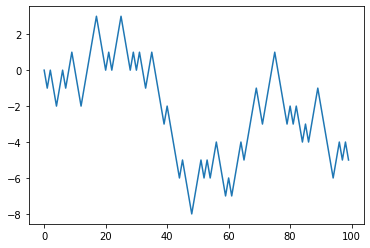

In [ ]:
plt.plot(walk[:100])

In [ ]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()
walk.min()

-20

In [ ]:
# 처음에서 10칸 이상 떨어진 시점(-10, 10)
(np.abs(walk) >= 10).argmax()

61